# 1 Cálculo de radiância

In [ ]:
print("*********************************************************************"); 
print('****        Código criado pelo Prof. Dr. Thiago Statella         ****'); 
print('****        Disciplina: Processamento Digital de Imagens         ****'); 
print('****  Instituto Federal de Educação, Ciência e Tecnologia de MT  ****'); 
print('*********************************************************************'); 
print(' '); 
print(' '); 

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # as imagens são lidas como numpy arrays
from matplotlib import pyplot as plt # é preciso chamar os submódulos
from skimage import io
from skimage import img_as_float, img_as_ubyte, img_as_uint
import datetime as dt
import math

In [5]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 255)
Dimensões: (1318, 1490)


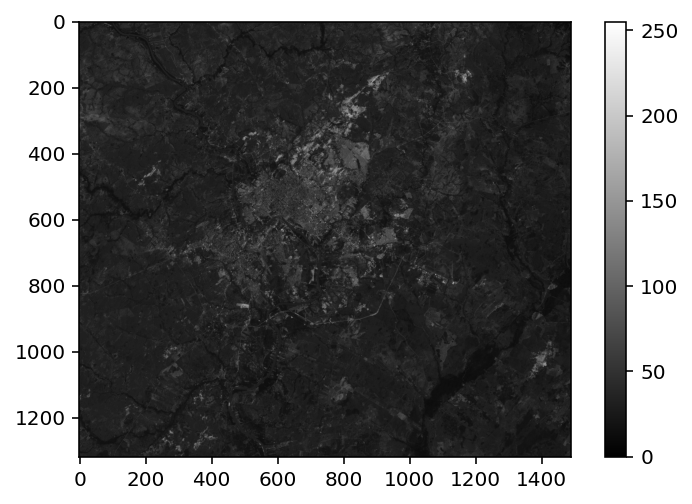

In [73]:
B3 = io.imread('LANDSAT_5_TM_19860908_226_071_L2_BAND3_Corte.tif')
B4 = io.imread('LANDSAT_5_TM_19860908_226_071_L2_BAND4_Corte.tif')
B6 = io.imread('LANDSAT_5_TM_19860908_226_071_L2_BAND6_Corte.tif')

data_info(B3)
plt.imshow(B3,cmap='gray')
plt.colorbar(); 

## 1.1 Criando uma função para calcular a radiância

In [21]:
def rad(Banda,Lmin,Lmax):
    Banda.astype(float)
    Rad   = (((Lmax - Lmin) / 255) * Banda) + Lmin
    return Rad 

In [74]:
B3_rad = rad(B3,-1.51,102.3)
B4_rad = rad(B4, -1.52,150.0)
B6_rad = rad(B6, 1.2378,15.303)

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (-1.51, 102.3)
Dimensões: (1318, 1490)


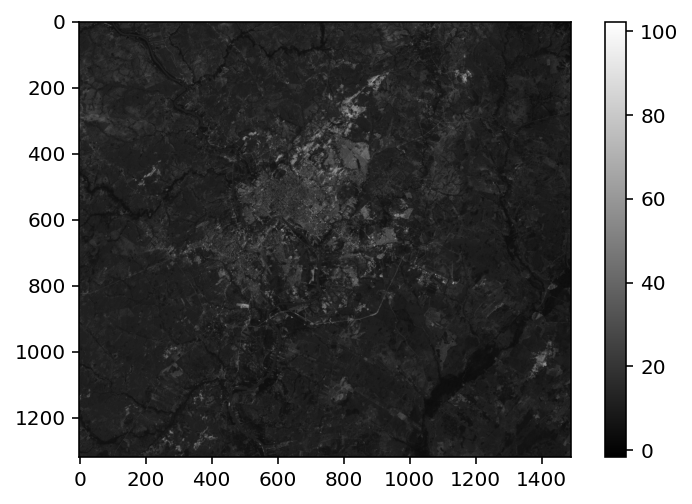

In [23]:
data_info(B3_rad)
plt.imshow(B3_rad,cmap='gray')
plt.colorbar(); 

Fazer para as bandas 4 e 6!

# 2 Cálculo de reflectância

Cálculo do DDA e d:

In [75]:
Data        = '1986-09-08' #data da imagem
Elevation   = 46.7330
Zenital     = 90.0 - Elevation

In [76]:
#Calculando a distância Terra-Sol******************************************
#Dia do ano
#obtenha a data a partir da string:

dda = dt.datetime.strptime(Data, "%Y-%m-%d").strftime('%j')
dda = float(dda)

d   = 1.0 + (0.0167 * math.sin(2 * math.pi * (dda - 93.5) / 365.0))

print(f"Dia do ano: {dda}")
print(f"Distância Terra-Sol: {d}")

Dia do ano: 251.0
Distância Terra-Sol: 1.0069671331636256


## 2.1 Criando uma função para calcular a reflectância

In [77]:
def ref(img,d,E,ang):
    Ref = (math.pi * img * d**2) / (E * math.cos(math.radians(ang)))
    return Ref

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (-0.003334583224139566, 0.22591249260230306)
Dimensões: (1318, 1490)


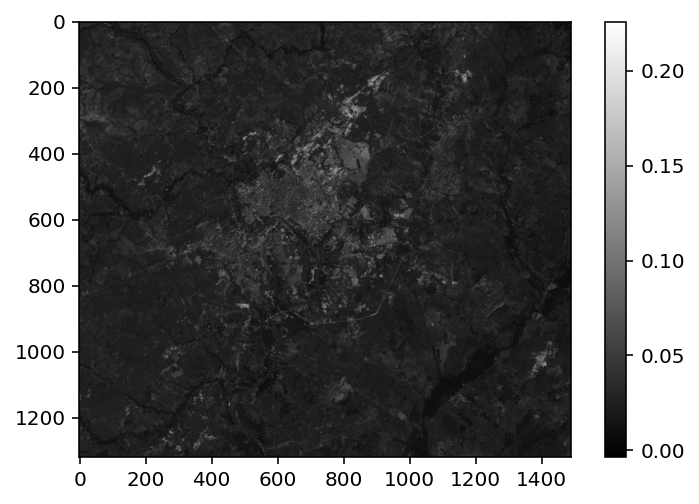

In [78]:
#%Reflectância (TOA)********************************************************
ESUN = 1981.0
B3_ref = ref(B3_rad,d,ESUN,Zenital)
ESUN = 1981.0
B4_ref = ref(B4_rad,d,ESUN,Zenital)

data_info(B3_ref)
plt.imshow(B3_ref,cmap='gray')
plt.colorbar(); 

Fazer o mesmo para a banda 4

# 3 Cálculo de NDVI

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (-0.6294180605458461, 1.1107281660189192)
Dimensões: (1318, 1490)


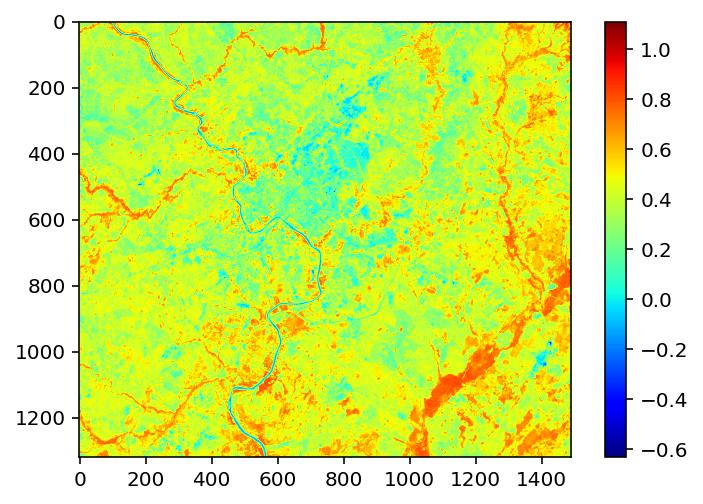

In [80]:
NDVI = (B4_ref - B3_ref) / (B4_ref + B3_ref)

data_info(NDVI)
plt.imshow(NDVI,cmap='jet')
plt.colorbar(); 

# 4 Cálculo de temperatura

Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (23.45014294018489, 38.8960845035578)
Dimensões: (331, 374)


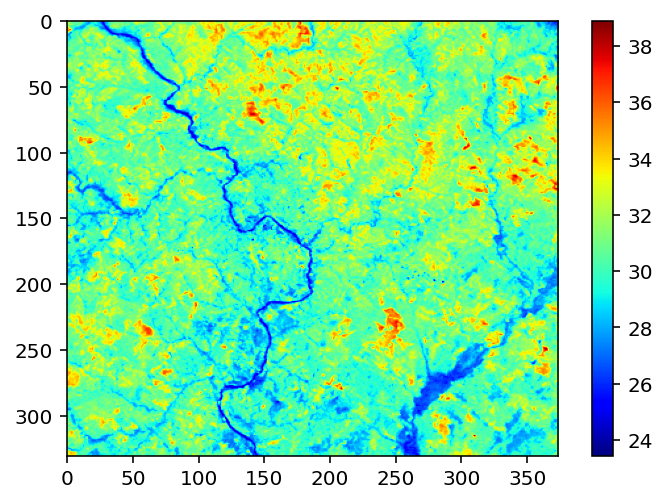

In [85]:
#%Entrada das constantes k1 e k2
k1 = 607.76
k2 = 1260.56

#%Cálculo da temperatura de brilho (Trad)
Trad = (k2 / (np.log((k1 / B6_rad) + 1))) - 273.15

data_info(Trad)
plt.imshow(Trad,cmap='jet')
plt.colorbar(); 

Cálculo de emissividade

In [ ]:
"""%Cálculo da emissividade com base no NDVI
%A imagem NDVI tem resolução melhor que a do IVT. Então é preciso
%reamostrar o NDVI para a resolução da banda termal a fim de calcular a
%emissividade para cada pixel da banda termal.
[m,n]=size(Trad);
NDVI_R = imresize(NDVI,[m n],'nearest');
E = zeros(m,n);
for i = 1 : m
    for j = 1 : n
        if NDVI_R(i,j) > 0.24
            E(i,j) = 1.009 + (0.047 * log(NDVI_R(i,j)));
        else
            E(i,j) = 0.94;
        end
    end
end

%Cálculo da temperatura cinética Tkin
Tkin = Trad ./ E.^(1/4);
"""